#### Secciones
* Series 
* DataFrames
 * crear o cargar un df 
 * primera exploracion de la estructura del df
 * subseting de columnas y filas
 * manipular datos


En uno de los ejercicios vistos en clase teniamos dos listas pareadas con los pesos moleculares de los aminoácidos.

In [ ]:
amino = [
        'I', 'L', 'K', 'M', 'F',
        'T', 'W', 'V', 'R', 'H',
        'A', 'N', 'D', 'C', 'E',
        'Q', 'G', 'P', 'S', 'Y'
        ]
pm = [
        131.1736, 131.1736, 146.1882, 149.2124, 165.1900,
        119.1197, 204.2262, 117.1469, 174.2017, 155.1552,
        89.0935,  132.1184, 133.1032, 121.1590, 147.1299,
        146.1451, 75.0669,  115.1310, 105.0930, 181.1894
    ]


In [ ]:
for aa,peso in zip(amino, pm):
    if peso > 150:
        print(aa, peso)

In [ ]:
pesos_moleculares = dict(zip(amino, pm)) # Convierto a un diccionario, las claves son la primer lista y los valores la segunda

for aa in pesos_moleculares:
    if pesos_moleculares[aa] > 150:
        print(aa, pesos_moleculares[aa])

### Pandas Series

In [ ]:
import pandas as pd

In [ ]:
serie = pd.Series(pm) # A partir de la lista de pesos moleculares construimos una Serie
serie

A diferencia con las listas o diccionarios, puedo hacer operaciones y comparaciones sencillamente sobre cada elemento de la serie:

In [ ]:
serie ** 2

In [ ]:
serie > 150

In [ ]:
serie[serie > 150]

Así como está no termina de servirnos para ver cuales son los aminoácidos de PM > 150.

Podemos definir el índice de las series, en este caso para trabajar directamente con los aminoácidos en vez de con las posiciones

In [ ]:
serie = pd.Series(pm, index=amino)

In [ ]:
serie[serie > 150]

Si recuerdan el ejercicio de energia potencial:

In [ ]:
h = 50
g = 9.8
print('"EP" a {}m y g de {}'.format(h,g))
serie * g * h 

### Pandas DataFrames

In [454]:
lista_pre_df = [['I', 'Ile', 131.1736],
 ['L', 'Leu', 131.1736],
 ['K', 'Lys', 146.1882],
 ['M', 'Met', 149.2124],
 ['F', 'Phe', 165.19],
 ['T', 'Thr', 119.1197],
 ['W', 'Trp', 204.2262],
 ['V', 'Val', 117.1469],
 ['R', 'Arg', 174.2017],
 ['H', 'His', 155.1552],
 ['A', 'Ala', 89.0935],
 ['N', 'Asn', 132.1184],
 ['D', 'Asp', 133.1032],
 ['C', 'Cys', 121.159],
 ['E', 'Glu', 147.1299],
 ['Q', 'Gln', 146.1451],
 ['G', 'Gly', 75.0669],
 ['P', 'Pro', 115.131],
 ['S', 'Ser', 105.093],
 ['Y', 'Tyr', 181.1894]]

for fila in lista_pre_df:
    print(fila[0], fila[1], fila[2])

I Ile 131.1736
L Leu 131.1736
K Lys 146.1882
M Met 149.2124
F Phe 165.19
T Thr 119.1197
W Trp 204.2262
V Val 117.1469
R Arg 174.2017
H His 155.1552
A Ala 89.0935
N Asn 132.1184
D Asp 133.1032
C Cys 121.159
E Glu 147.1299
Q Gln 146.1451
G Gly 75.0669
P Pro 115.131
S Ser 105.093
Y Tyr 181.1894


de una manera similar a como construímos una serie, podemos construir un dataframe (tabla).

In [ ]:
df = pd.DataFrame(lista_pre_df)
df

In [ ]:
# renombrar las columnas:
df.columns = ['aa', 'codigo', 'pm']

Podemos ver las primeras 5 filas de nuestra tabla utilizando el método ```.head()```

In [ ]:
df.head()

si al contrario, queremos ver las ultimas filas utilizamos ```.tail()```

In [ ]:
df.tail()

Para conocer las dimensiones de la tabla utilizamos el atributo ```.shape```

In [ ]:
dims = df.shape
print('dimensiones:', dims)
nrows = df.shape[0]
ncols = df.shape[1]
print('La tabla tiene {} filas y {} columnas'.format(nrows, ncols))

Otro método muy útil de los dataframes es ```.info()```

In [ ]:
df.info()

la tabla no parece estar ordenada, como hacemos para ordenarla según algún criterio? 

utilizando el método ```.sort_values()```

In [ ]:
df.sort_values('aa')

Cambió la tabla orginal?

Qué podríamos hacer para que quede definitivamente ordenado?

---

### Cargar Tablas

La mayoría de las veces vamos a cargar datos tabulados en algun formato, en lugar de construirlos nosotros mismos con ```pd.DataFrame()```.

Qué método tenemos que utilizar para leer esos archivos depende del tipo de archivo y de como estén organizados o separados los datos, las opciones más comúnes son archivos de textos separados por:
+ comas ","
+ tabulaciones "\'t"
+ espacios " "

En estos casos se utiliza el ḿetodo ```pd.read_csv()``` aclarando el tipo de separador, por ej:

```python
tabla = pd.DataFrame(ruta_del_archivo, sep = ',')     # separados por coma
tabla = pd.DataFrame(ruta_del_archivo, sep = '\t')    # tabulaciones
tabla = pd.DataFrame(ruta_del_archivo, sep = ' ')     # espacios
```

tambien se pueden abrir archivos excel con ```pd.read_excel()```, algunas tablas de de paginas web con ```pd.read_html()```, y varios más.

Vamos a descargar una tablas con algunos datos de COVID19 de paises de América

El siguiente comando descarga el archivo

In [ ]:
# Descargar tabla
!wget https://raw.githubusercontent.com/Ferorti/escuela2021/main/data/america.tab

In [ ]:
!ls

In [ ]:
!head america.csv

In [472]:
df = pd.read_csv('../data/america.csv', index_col='pais') # Por que no pongo el sep=',' ?

Realicemos un primer ańalsis exploratorio sobre esta tabla.

+ ver las primeras 5 filas del df
+ ver las ultimas 5
+ Cuantas filas y columnas tiene el df? de qué tipo es cada columna?
+ Como son los índices de este df comparado con el anterior? son del mismo tipo?
+ ordene los datos por cantidad de casos totales de forma descendente.
+ que información obtenemos con describe()



Cuando tenemos datos numéricos, un método muy útil para tener una idea de cómo son los datos es el ```.describe()```

---

#### Subsets de datos

Muchas veces no queremos trabajar con todos los datos disponibles en la tabla sino con una parte.
La idea es poder decirle a python qué filas y qué columnas del dataframe queremos conservar u obtener.


El subset de datos se puede hacer de varias formas, el primero que vamos a ver es ```.loc[]``` con la siguiente sintaxis:

```python
subset = df.loc[filas, columnas]
```

In [ ]:
filas_del_subset = ['Argentina', 'Brasil', 'Paraguay', 'Uruguay']
columnas_del_subset = ['casos_totales', 'fallecidos']

In [ ]:
subset = df.loc[filas_del_subset, columnas_del_subset]
subset.sort_values('casos_totales', ascending=False)

A veces querenos quedarnos con algunas columnas y todas las filas (o algunas filas y todas las columnas)
Las dos cosas podemos hacer utilizando ```.loc[]```, poniendo ```.loc[]``` y dos puntos ```:``` en lugar de la lista:

Por ej:

```python
subset = df.loc[ : , columnas] # Me quedo con todas las filas, y las columnas de interes
subset = df.loc[ filas , : ] # Me quedo con todas las filas, y las columnas de interes

```

In [ ]:
df.loc[ : , columnas_del_subset ] # Todas las filas

In [ ]:
df.loc[ filas_del_subset , : ] # Todas las columnas

Que pasa si pongo ```.loc[:,:]```

Hasta ahora hicimos un subset con varias filas y varias columnas, que pasa si lo quiero hacer sobre solo una fila o solo una columna?

In [ ]:
df.loc[:, 'casos_totales']

In [ ]:
df.loc[filas_del_subset, 'casos_totales']

In [ ]:
df.loc["USA", columnas_del_subset]

Pandas nos ofrece formas simplificadas realizar subsets
Por ej:
```python

# Columnas
casos_totales = df['casos_totales']            # Me quedo solo con la columna casos totales y todas las filas
casos_totales = df.casos_totales               # Me quedo solo con la columna casos totales y todas las filas, esta forma tiene limitaciones
casos_y_fallecidos = df[['casos_totales', 'fallecidos']] # Me quedo con la columnas casos_totales  y fallecidos, y todas las filas

# Filas
usa = df.loc['USA']
mercosur_df = df.loc[filas_del_subset]

```

In [ ]:
mercosur_df = df.loc[filas_del_subset]
mercosur_df

Como vimos hasta ahora podemos realizar subsets de datos utilizando los nombres de las columnas o el índice.

Además, con ```.loc[:,:]``` podemos utilizar listas de booleanos para el subset. En estos casos nos vamos a quedar con las filas(o columnas) que tengan True en la lista:

Por ej


In [ ]:
mask = [True, False, True, True]

In [ ]:
subset.loc[mask, : ]

Generalmente no le vamos a pasar una lista de booleanos creada por nosotrxs sino una lista o serie de booleanos proveniente de una operación de comparación:

In [ ]:
casos_totales = df['casos_totales']
mas_1M = casos_totales > 1_000_000
mas_1M

In [ ]:
df.loc[mas_1M, ['casos_totales', 'fallecidos']]

Hay otro método bastante útil para seleccionar filas segun se cumpla una condicion, el método ```.query()```:

```python 

df.query('casos_totales > 1_000_000')

```


Por ultimo en cuanto a subseting, también podemos seleccionar filas o columnas según su posición, en lugar del índice. Para eso se utiliza el 'metodo' ```iloc[]```

In [ ]:
df.iloc[:5, :] #equivalente al método .head()

In [ ]:
df.iloc[3:8, 3:-2]   # De la cuarta fila a la octava, de la cuarta columna a la antpeneultima

Para hacer:
A partir del dataframe df, generar otro dataframe llamado sudamerica con:
+ Sólo los paises de Sudamérica
+ Ordenado por la cantidad de fallecidos (de mayor a menor)
+ Que muestre las columnas casos_totales, fallecidos, condicion_critica y recuperados (En ese orden)

In [ ]:
casos = {}
for fila in df.iterrows():
    print(fila)

Para hacer:

utilizando un bucle for, genere un dicionario con los paises de centroamerica como claves y el porcentaje de letalidad (fallecidos por 100 casos confirmados) respectivo a cada pais como valores.

---

#### Manipular los datos

In [ ]:
# solo los paises de sudamerica

sudamerica = df.loc[df['region'] == 'S', ['casos_totales','fallecidos', 'condicion_critica', 'recuperados']]

sudamerica = sudamerica.sort_values('fallecidos', ascending=False)

sudamerica

In [ ]:
sudamerica = sudamerica.query('casos_totales > 1_000_000')

In [ ]:
pd.options.mode.chained_assignment = None  # ocultar alertas

En pandas podemos generar nuevos datos a partir de los existentes, de multiples maneras:

Por ejemplo con operaciones matematicas entre una columna y un numero

In [ ]:
sudamerica['casos_totales'] / 1_000_000 # Podemos separar los numeros con _ para poder leerlos mejor, Python va a ignorar los _

In [ ]:
sudamerica['millon_de_casos'] = sudamerica['casos_totales'] / 1_000_000


Podemos también aplicar los métodos de una serie para cambiarla sus valores o para agregarla en otra columna:

In [ ]:
sudamerica['millon_de_casos'] = sudamerica['millon_de_casos'].round(2)


También nos permite realizar operaciones matemáticas combinando series y números

In [ ]:
sudamerica['letalidad'] = sudamerica['fallecidos'] / sudamerica['casos_totales'] * 100

In [ ]:
sudamerica['tasa_recuperados'] = sudamerica['recuperados'] / sudamerica['casos_totales']


Otra opcion que nos permite pandas es aplicar generar  series aplicando una funcion a todos los elementos de la serie, utilizando el método  ```.map()``` de la serie.
Con la siguiente sintaxis:
 ```python
nueva_serie = serie.map(nombre_de_funcion_de_interes)
```

In [ ]:
def porciento(numero):
    redondeo = round(numero * 100)
    return '{}%'.format(redondeo)

In [ ]:
sudamerica['porcentaje_recuperados'] = sudamerica.tasa_recuperados.map(porciento) # la funcion no lleva los parentesis

In [ ]:
sudamerica.info()

puedo operar con el índice, que tambien es un subtipo particular de Series.

In [ ]:
sudamerica.index

el metodo map es muy versátil, no solo acepta funciones sino tambien diccionarios:

In [ ]:
poblaciones = {'USA': 332299143, 'Brasil': 213568068, 'Argentina': 45472346, 'Canada': 37962879, 'Peru': 33277411,'Colombia': 51244298}

In [ ]:
sudamerica['poblacion'] = sudamerica.index.map(poblaciones)

In [ ]:
sudamerica

Para hacer:
Crear las siguientes columnas:
+ casos millon de habitantes
+ fallecidos cada 100 mil habitantes

---

In [ ]:
sudamerica['casos_por_millon'] = sudamerica['casos_totales'] / sudamerica['poblacion'] * 1_000_000

In [ ]:
sudamerica['fallecidos_por_cienmil'] = sudamerica.fallecidos / sudamerica.poblacion * 100_000

In [ ]:
sudamerica

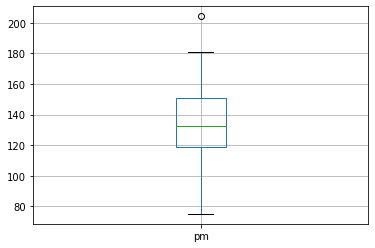

In [455]:
df.boxplot()

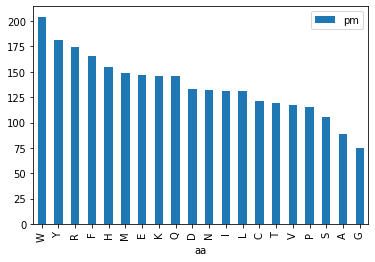

In [461]:
df.set_index("aa").sort_values("pm", ascending=False).plot.bar()

In [480]:
serie.index

RangeIndex(start=0, stop=20, step=1)